                            **INDEPENDENT T-TEST WITH PYTHON**

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

In [1]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


# INDEPENDENT T-TEST USING RESEARCHPY

The method returns 2 data frames, one that contains the summary statistical information and the other that contains the statistical test information. If the returned data frames are not stored as a Python object then the output will be less clean than it can be since it will be displayed as a tuple - see below.



In [17]:
rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
         group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")

/opt/homebrew/anaconda3/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N        Mean         SD        SE   95% Conf.    Interval
 0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
 1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
 2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046,
               Independent t-test   results
 0  Difference (Male - Female) =     8.3167
 1          Degrees of freedom =   118.0000
 2                           t =     3.3480
 3       Two side test p value =     0.0011
 4      Difference < 0 p value =     0.9995
 5      Difference > 0 p value =     0.0005
 6                   Cohen's d =     0.6112
 7                   Hedge's g =     0.6074
 8              Glass's delta1 =     0.5456
 9            Point-Biserial r =     0.2945)

If stored as Python objects, they will be stored as Pandas data frames. This means that anything that can be done to a traditional Pandas data frame can be done to these results.

In [14]:
summary, results = rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
                            group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")
pd.DataFrame(summary)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Male,60.0,155.516667,15.243217,1.967891,151.578926,159.454407
1,Female,60.0,147.200000,11.742722,1.515979,144.166533,150.233467
2,combined,120.0,151.358333,14.177622,1.294234,148.795621,153.921046


In [15]:
pd.DataFrame(results)

,Independent t-test,results
0,Difference (Male - Female) =,8.3167
1,Degrees of freedom =,118.0000
2,t =,3.3480
3,Two side test p value =,0.0011
4,Difference < 0 p value =,0.9995
5,Difference > 0 p value =,0.0005
6,Cohen's d =,0.6112
7,Hedge's g =,0.6074
8,Glass's delta1 =,0.5456
9,Point-Biserial r =,0.2945


Before the results should be interpreted, the assumptions of the test should be checked. For example purposes, the results will be interpreted before checking the assumptions.

**Interpretation**

The average blood pressure after the treatment for males, M= 155.2 (151.6, 159.5), was statistically signigicantly higher than females, M= 147.2 (144.2, 150.2); t(118)= 3.3480, p= 0.001.

# INDEPENDENT T-TEST USING SCIPY.STATS

This method conducts the independent sample t-test and returns only the t test statistic and it's associated p-value. For more information about this method, please refer to the official documentation page. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [6]:
stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)

In [ ]:
stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

**Interpretation**

There is a statistically significant difference in the average post blood pressure between males and females, t= 3.3480, p= 0.001.

# ASSUMPTION CHECK

The assumptions in this section need to be met in order for the test results to be considered valid. A more in-depth look at parametric assumptions is provided here, which includes some potential remedies.

**THE TWO SAMPLES ARE INDEPENDENT**

This assumption is tested when the study is designed. What this means is that no individual has data in group A and B.

**POPULATION DISTRIBUTIONS ARE NORMAL**

One of the assumptions is that the sampling distribution is normally distributed. This test of normality applies to the difference in values between the groups. One method for testing this assumption is the Shapiro-Wilk test. This can be completed using the shapiro() method from Scipy.stats.

In [7]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.98586106300354, pvalue=0.7147841453552246)

Unfortunately, the output is not labelled but is in the format of (W test statistic, p-value). The test is not significant which indicates the sampling distribution is normally distributed.

Another way to test the assumption is through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

One method of visually checking the distribution is to use a probability plot with or without the correlation value, , to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats.

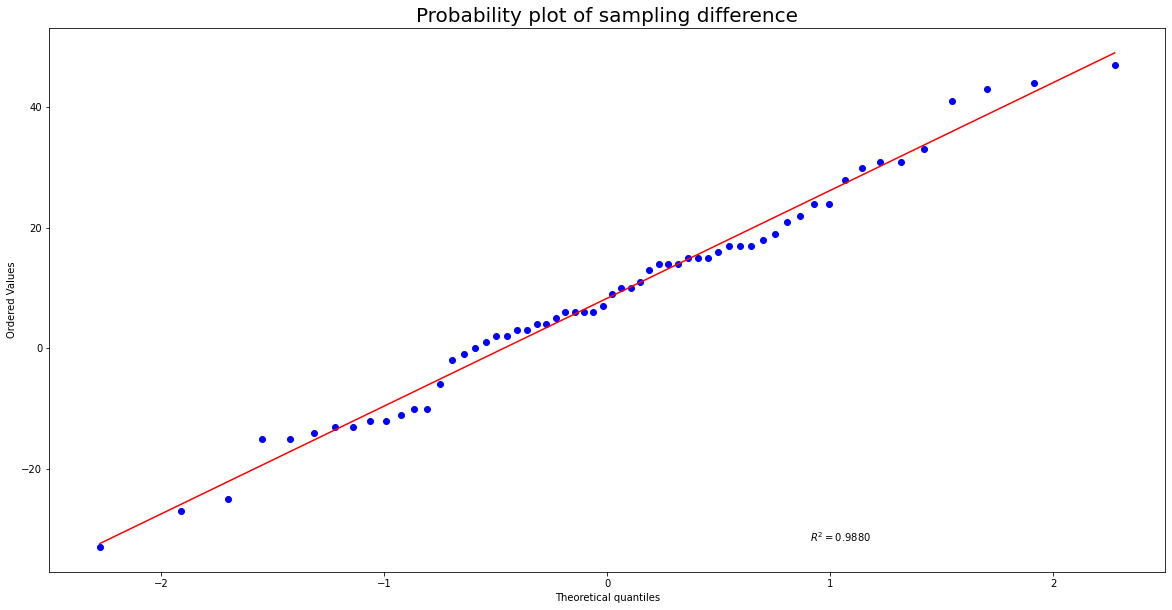

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

**HOMOGENEITY OF VARIANCE**

In [10]:
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'],
             center= 'mean')

LeveneResult(statistic=5.865854141268659, pvalue=0.01695904277978066)

The test is significant which indicates the groups have a different amount of variation and that the t-test may not be the best statistical method to be used. Again, it may be worthwhile to check this assumption visually as well.

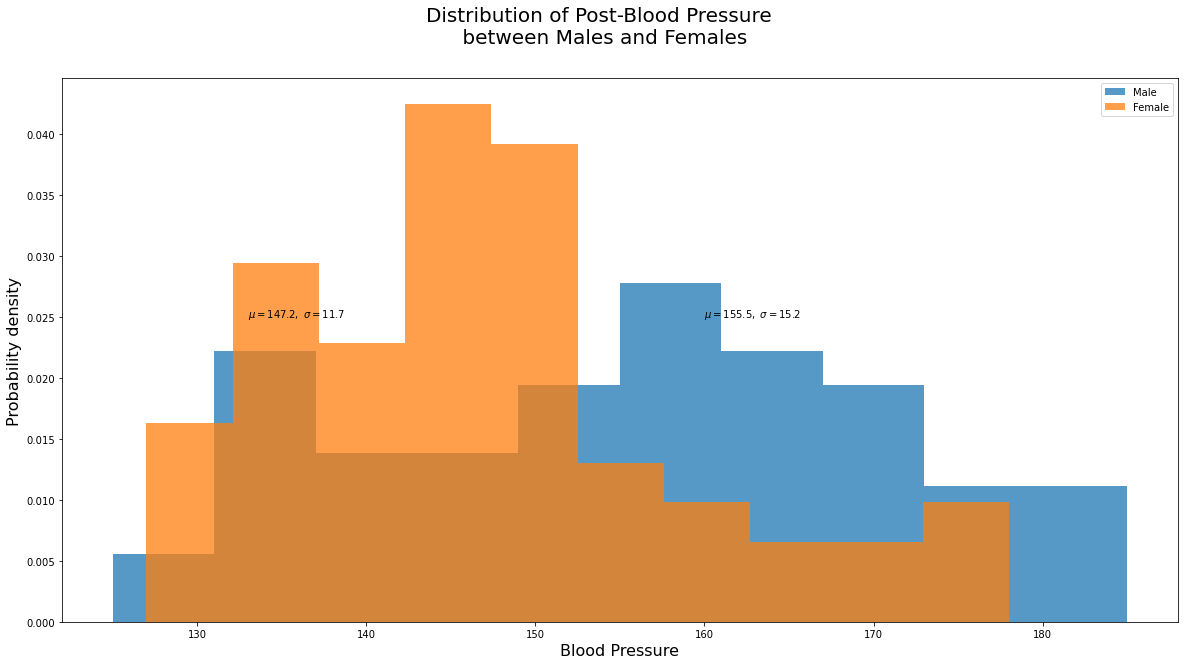

In [12]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(df['bp_after'][df['sex'] == 'Male'], label= "Male",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df['bp_after'][df['sex'] == 'Female'], label= "Female",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Post-Blood Pressure \n between Males and Females", fontsize= 20)
plt.xlabel("Blood Pressure", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Female'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Female'].std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Male'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Male'].std(): .1f}$")

ax.legend()
plt.show()

There are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test.